# Advanced Classification Day 2 - Exercises

## Exercise 1

#### Question 1 
##### Load libraries that are used in this module.

In [176]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plots"

In [177]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.legend_handler import HandlerLine2D

# New today
from sklearn.model_selection import RandomizedSearchCV

In [178]:
# just for safety capture the original main path - when you re-run the book we will always start from the original folder
# this is similar to here() in R which captures the project root.
# https://github.com/ipython/ipython/issues/10123
nb_root=globals()['_dh']
os.chdir(nb_root[0])

main_dir = os.path.abspath(os.path.join ("..",))

# Make `data_dir` and 'path_dir' from the `main_dir` and
data_dir = os.path.join(main_dir, "data")
plot_dir = os.path.join(main_dir, "plot")

In [179]:
print(main_dir)
print(data_dir)
print(plot_dir)

/Users/datasociety/Desktop/af-werx
/Users/datasociety/Desktop/af-werx/data
/Users/datasociety/Desktop/af-werx/plot


#### Question 2
##### Set `main_dir` to the location of your `af-werx` folder.
##### Make `data_dir`  from the `main_dir` and concatenate remainder of the path to data directory.

In [180]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


#### Question 3
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir`.

In [181]:
print('see above')

see above


#### Question 4
##### Load the clean pickled dataset `chicago_no_hc` and save as `census`.
##### Print the head of the census.

In [265]:
census = pickle.load(open('chicago_census.sav', 'rb'))
census.head()


,percent_house_crowded,percent_house_below_poverty,percent_16_unemployed,percent_dependent,hardship_index,income
0,7.7,23.6,8.7,27.5,39.0,0
1,7.8,17.2,8.8,38.5,46.0,0
2,3.8,24.0,8.9,22.2,20.0,1
3,3.4,10.9,8.2,25.5,17.0,1
4,0.3,7.5,5.2,26.2,6.0,1


#### Question 5
##### Select the predictors by dropping variable `income` and save the result to a dataframe `X_ex`.
##### Save the target variable `income` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into training and test sets with 70:30 ratio and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.

In [70]:
def df_target_split(df, target, s = 1, ts = .3):
    """"""
    # Separate target from data.
    ex_y = np.array(df[f'{target}'])
    # Split the predictors from data.
    ex_x = df.drop(f'{target}', axis = 1)

    # Set the seed.
    np.random.seed(s)
    
    # Split data into training and test set
    ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_x, ex_y, test_size = ts)
    
    return ex_X_train, ex_X_test, ex_y_train, ex_y_test

In [219]:
ex_X_train, ex_X_test, ex_y_train, ex_y_test = df_target_split(census, 'income', 1)

#### Question 6
##### Load the random forest model `ex_model_forest.sav` we saved during last week's exercise.
##### Save it as `forest_ex`.
##### We will use this base model to optimize our random forest.

In [72]:
ex_forest = pickle.load(open("ex_model_forest.sav","rb"))
ex_forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

#### Question 7
##### Create a grid of parameter ranges as we did in class
##### Call it `random_grid_ex`.

In [73]:
#=================================================-
#### Slide 16: Parameter grid  ####

# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 200, 
                                            stop = 2000,
                                            num = 10)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]


# Create the random grid.
ex_random_grid = {'n_estimators': n_estimators,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf}
print(ex_random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


#### Question 8
##### Instantiate the model, call it `rf_random_ex`.
##### Use 3-fold cross-validation with 100 different combinations.
##### Look at the `best_params_`.

In [ ]:
import cProfile
from timeit import default_timer as timer

n_jobs=-1

rf_random = RandomizedSearchCV(estimator = forest,
                               param_distributions = random_grid, 
                               n_iter = 100,
                               cv = 3,
                               verbose = 0, 
                               random_state = 1, 
                               n_jobs = n_jobs)

start = timer()
# Fit the random search model. 
cProfile.run('rf_random.fit(X_train, y_train)', 'restats_{}_njobs_randgrid'.format(str(n_jobs)))
end = timer()
print('The job took {} min with {} jobs'.format((end - start)/60, n_jobs))

rf_random.best_params_

In [35]:
import cProfile
from timeit import default_timer as timer
from sklearn.model_selection import ShuffleSplit
n_jobs= -1

ex_rf_random = RandomizedSearchCV(estimator = ex_forest, 
                               param_distributions = ex_random_grid,
                               n_iter = 100,
                               cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0), 
                               verbose = 0,
                               random_state = 1, 
                               n_jobs = -1)

start = timer()
# Fit the random search model. 
cProfile.run('ex_rf_random.fit(ex_X_train, ex_y_train)', 'restats_{}_njobs_randgrid'.format(str(n_jobs)))
end = timer()
print('The job took {} min with {} jobs'.format((end - start)/60, n_jobs))

ex_rf_random.best_params_

The job took 2.584101788766657 min with -1 jobs


{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [36]:
ex_rf_random_CV = RandomizedSearchCV(estimator = ex_forest, 
                               param_distributions = ex_random_grid,
                               n_iter = 100,
                               cv = 3, 
                               verbose = 0,
                               random_state = 1, 
                               n_jobs = -1)

start = timer()
# Fit the random search model. 
cProfile.run('ex_rf_random_CV.fit(ex_X_train, ex_y_train)', 'restats_{}_njobs_randgrid'.format(str(n_jobs)))
end = timer()
print('The job took {} min with {} jobs'.format((end - start)/60, n_jobs))

print(ex_rf_random_CV.best_params_)

The job took 2.608863882616667 min with -1 jobs
{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60}


#### Question 9
##### Now use the optimized parameters to implement the optimized model on `X_train_ex`.
##### Name it `optimized_forest_ex`.

In [74]:
best_params = ex_rf_random.best_params_
print(best_params)

{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}


In [75]:
best_params_CV = ex_rf_random_CV.best_params_
print(best_params_CV)

{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60}


In [76]:
ex_optimized_forest = RandomForestClassifier(**best_params)
ex_optimized_forest.fit(ex_X_train, ex_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
ex_optimized_forest_CV = RandomForestClassifier(**best_params_CV)
ex_optimized_forest_CV.fit(ex_X_train, ex_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Exercise 2

#### Question 1
##### Predict and save the predictions as `optimized_forest_y_predict_ex`.
##### Find the accuracy of the optimized forest.

In [78]:
def plt_cm(y_test, y_predict):
    
    #Take a look at test data confusion matrix and get accuracy
    conf_matrix = metrics.confusion_matrix(y_test, y_predict)
    accuracy = metrics.accuracy_score(y_test, y_predict)
    
    # make pretty and plot
    plt.clf()
    plt.imshow(conf_matrix, 
               interpolation='nearest', 
               cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j]) + " = " + str(conf_matrix[i][j]))
    plt.show()
    # print accuracy
    print("Accuracy for the model on test data: ", accuracy)
    return accuracy

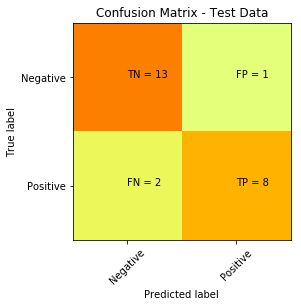

Accuracy for the model on test data:  0.875


In [79]:
ex_optimized_forest_y_predict = ex_optimized_forest.predict(ex_X_test)
# Look at the first few predictions.
optimized_accuracy_forest_ex = plt_cm(ex_y_test, ex_optimized_forest_y_predict)

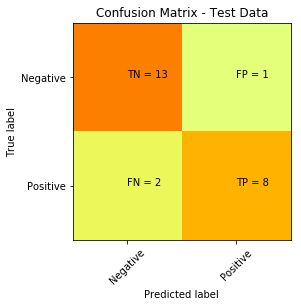

Accuracy for the model on test data:  0.875


In [80]:
ex_optimized_forest_y_predict_CV = ex_optimized_forest_CV.predict(ex_X_test)
# Look at the first few predictions.
optimized_accuracy_forest_ex_CV = plt_cm(ex_y_test, ex_optimized_forest_y_predict_CV)

In [54]:
print(ex_optimized_forest_y_predict_CV)

[0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0]


In [55]:
print(ex_optimized_forest_y_predict)

[0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0]


#### Question 2
##### Load the pickled dataframe `ex_model_final_rf_gbm.sav` we created in the last class and save as `ex_model_final_optimized`.
##### Append the accuracy `optimized_forest_accuracy_ex` obtained above to the dataframe.

In [85]:
ex_model_final_optimized = pickle.load(open('ex_model_final.sav', 'rb'))

In [86]:
def update_model_score(model_df, model_accuracy, m_name):
    model_df = model_df.append(
    {'metrics' : "accuracy" ,
     'values' : round(model_accuracy,4),
     'model': m_name
    },
    ignore_index = True
    )
    
    print(model_df)
    return model_df

In [87]:
ex_model_final_optimized = update_model_score(ex_model_final_optimized, optimized_accuracy_forest_ex, 'optimized_accuracy_forest_cv_shuffle')

     metrics  values                                 model
0   accuracy  0.8333                                 knn_5
1   accuracy  0.9359                      knn_GridSearchCV
2   accuracy  0.9583                                knn_27
3   accuracy  1.0000                              logistic
4   accuracy  1.0000                  logistic_withdummies
5   accuracy  1.0000                        logistic_tuned
6   accuracy  0.9167                    tree_simple_subset
7   accuracy  0.9583               full_tree_simple_subset
8   accuracy  0.9583            full_tree_optimized_subset
9   accuracy  0.8750                         random forest
10  accuracy  0.8750                      gradient_booster
11  accuracy  0.8750  optimized_accuracy_forest_cv_shuffle


In [88]:
ex_model_final_optimized = update_model_score(ex_model_final_optimized, optimized_accuracy_forest_ex_CV, 'optimized_accuracy_forest_cv')

     metrics  values                                 model
0   accuracy  0.8333                                 knn_5
1   accuracy  0.9359                      knn_GridSearchCV
2   accuracy  0.9583                                knn_27
3   accuracy  1.0000                              logistic
4   accuracy  1.0000                  logistic_withdummies
5   accuracy  1.0000                        logistic_tuned
6   accuracy  0.9167                    tree_simple_subset
7   accuracy  0.9583               full_tree_simple_subset
8   accuracy  0.9583            full_tree_optimized_subset
9   accuracy  0.8750                         random forest
10  accuracy  0.8750                      gradient_booster
11  accuracy  0.8750  optimized_accuracy_forest_cv_shuffle
12  accuracy  0.8750          optimized_accuracy_forest_cv


## Exercise 3

#### Question 1

##### Create a function named `optimal_parameter` that will help us store the parameters we will be using in our optimized gradient boosting classifier.

##### The inputs to the function should be:

* `values` : list of values for given parameter that we iterate through
* `test_results` : predictions on test set for each parameter that we iterate over

##### The output of the function should be:

* `best_value` : the actual parameter value that performs best and that we will use in our final optimized boosting model

In [231]:
ex_y_test

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0])

In [232]:
# define function for plotting
def plot_results(optimizer, train_results, test_results, o_param):
    line1, = plt.plot(optimizer,
                      train_results, 
                      'b', 
                      label = "Train accuracy")
    line2, = plt.plot(optimizer, 
                      test_results, 
                      'r', 
                      label = "Test accuracy")
    plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
    plt.ylabel('Accuracy')
    plt.xlabel(o_param)
    plt.show()

In [233]:
# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    ex_best_value = values[best_test_index]
    return(ex_best_value)

In [234]:
# define function to optimize model
def model_optimizer(df, target, model, optimizer, o_param, seed = 1):
    # intiate empty lists
    train_results = []
    test_results = []
    
    # call function to split train and test data, specify income
    X_train, X_test, Y_train, Y_test = df_target_split(df, target, seed)
    
    for i in optimizer:
        
        # pass o_param as dictionary key and i as value
        params = { o_param : i}
        
        # pass and unpack params dictionary as specified parameter
        model = model.set_params(**params)
        
        # fit data
        model.fit(X_train, Y_train)
        train_pred = model.predict(X_train)
        acc_train = accuracy_score(Y_train, train_pred)

        # Add AUC score to previous train results
        train_results.append(acc_train)
        y_pred = model.predict(X_test)
        acc_test = accuracy_score(Y_test, y_pred)

        # Add AUC score to previous test results
        test_results.append(acc_test)

    #plot the results
    plot_results(optimizer, train_results, test_results, o_param)

    # return optimal parameter.
    return optimal_parameter(optimizer, test_results)

#### Question 2

##### Find the optimum learning rate for the gradient boosting model among a range of values. 
`learning_rates = [1, 0.5, 0.25, 0.1]`

##### Save it as `optimal_learning_rate_ex` and print the value.

In [235]:
gbm_o = GradientBoostingClassifier()

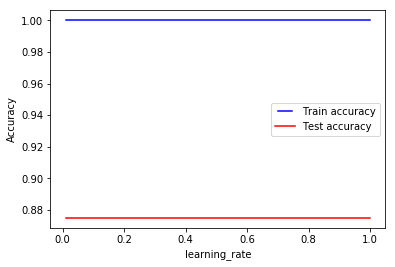

1

In [236]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
ex_optimal_learning_rate = model_optimizer(census, 'income', gbm_o, learning_rates, 'learning_rate', 1)
ex_optimal_learning_rate

#### Question 3

##### Plot the learning rate against train_results_ex and test_results_ex.

In [237]:
print('see above')

see above


#### Question 4

##### Find the optimum n_estimators for the gradient boosting model among a range of values.
`n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]`

##### Save it as `optimal_n_estimators_ex` and print the value.

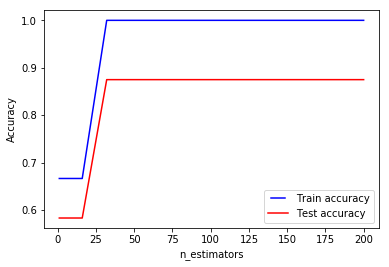

32

In [238]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
ex_optimal_n_estimators = model_optimizer(census, 'income', gbm_o, n_estimators, 'n_estimators', 1)
ex_optimal_n_estimators

#### Question 5

##### Plot the n_estimators against  train_results_ex and test_results_ex.

In [239]:
census.columns.values

array(['percent_house_crowded', 'percent_house_below_poverty',
       'percent_16_unemployed', 'percent_dependent', 'hardship_index',
       'income'], dtype=object)

In [240]:
print('see above')

see above


#### Question 6

##### Find the optimum max_depth for the gradient boosting model among the given values.
`max_depths = np.linspace(1, 32, 32, endpoint = True)`

##### Save it as `optimal_max_depth_ex` and print the value.

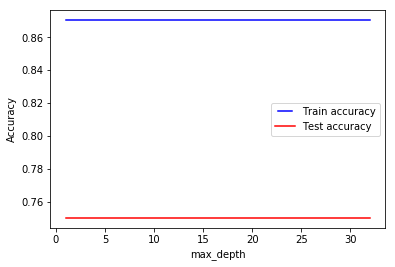

1.0

In [253]:
max_depths = np.linspace(1, 32, 32, endpoint = True)
ex_optimal_max_depths = model_optimizer(census, 'income', gbm_o, max_depths, 'max_depth', 1)
ex_optimal_max_depths

#### Question 7

##### Plot the max_depth against  train_results_ex and test_results_ex.

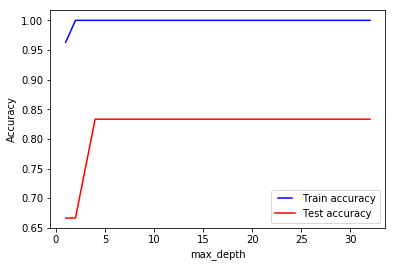

4.0

In [242]:
max_depths = np.linspace(1, 32, 32, endpoint = True)
ex_optimal_max_depths2 = model_optimizer(census_droped_hardship, 'income', gbm_o, max_depths, 'max_depth', 1)
ex_optimal_max_depths2

In [243]:
print('see above')

see above


#### Question 8

##### Find the optimum minimum number of samples required to split an internal node `min_samples_split` for the gradient boosting model among a range of values
`min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)`

##### Save it as `optimal_min_samples_split_ex` and print the value.

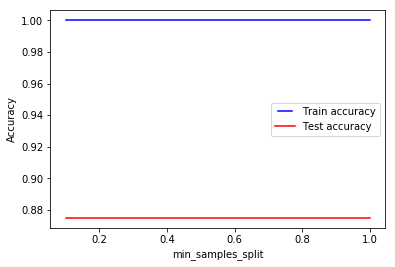

0.1

In [244]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)
ex_optimal_min_samples_splits = model_optimizer(census, 'income', gbm_o, min_samples_splits, 'min_samples_split', 1)
ex_optimal_min_samples_splits

#### Question 9

##### Plot the min_samples_split against  train_results_ex and test_results_ex.

In [245]:
print('see above ')

see above 


#### Question 10

##### Find the optimum minimum number of samples required to be at a leaf node `min_samples_leaf` for the gradient boosting model among a range of values.
`min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)`

##### Save it as `optimal_min_samples_leafs_ex` and print the value.

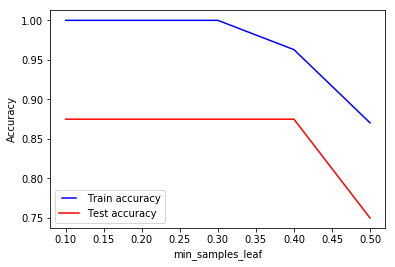

0.1

In [246]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
ex_optimal_min_samples_leafs = model_optimizer(census, 'income', gbm_o, min_samples_leafs, 'min_samples_leaf', 1)
ex_optimal_min_samples_leafs

#### Question 11

##### Plot the min_samples_leaf against  train_results_ex and test_results_ex.

In [247]:
print('see above')

see above


#### Question 12

##### Find the optimum number of features to consider when looking for the best split `max_features` for the gradient boosting model among a range of values.
`max_features = list(range(1,X_ex.shape[1]))`

##### Save it as `optimal_max_features_ex` and print the value.

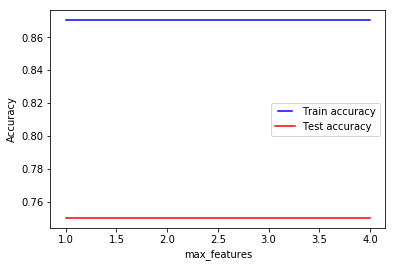

1

In [248]:
max_features = list(range(1, ex_X_train.shape[1]))
ex_optimal_max_features = model_optimizer(census, 'income', gbm_o, max_features, 'max_features', 1)
ex_optimal_max_features

#### Question 13

##### Plot the max_features against  train_results_ex and test_results_ex.

In [249]:
print('see above')

see above


## Exercise 4

#### Question 1

##### Now use the optimized parameters to implement the optimized gradient boosting model on `X_train_ex`.
##### Name it `optimized_gbm_ex`.

In [252]:
print("The optimal learning rate is:", ex_optimal_learning_rate)
print("The optimal number of estimators is:", ex_optimal_n_estimators)
print("The optimal max depth is:", ex_optimal_max_depths)
print("The optimal min samples split is:", ex_optimal_min_samples_splits)
print("The optimal min samples leaf is:", ex_optimal_min_samples_leafs)
print("The optimal max features is:", ex_optimal_max_features)

The optimal learning rate is: 1
The optimal number of estimators is: 32
The optimal max depth is: 1.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 1


#### Question 2
##### Predict on the test data using our optimized gbm classifier `optimized_gbm_ex`.
##### Print the first 5 predicted values.

In [260]:
# Set the seed.
np.random.seed(1)

# Implement the decision tree on X_train.
ex_gbm_optimized = GradientBoostingClassifier(learning_rate = ex_optimal_learning_rate,
                                              n_estimators = ex_optimal_n_estimators,
                                              max_depth = ex_optimal_max_depths,
                                              min_samples_split = ex_optimal_min_samples_splits,
                                              min_samples_leaf = ex_optimal_min_samples_leafs,
                                              max_features = ex_optimal_max_features)

# We can now see our optimized features where before they were just default:
print(ex_gbm_optimized)

ex_gbm_optimized_fit = ex_gbm_optimized.fit(ex_X_train, ex_y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1, loss='deviance', max_depth=1.0,
              max_features=1, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=0.1, min_samples_split=0.1,
              min_weight_fraction_leaf=0.0, n_estimators=32,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [261]:
ex_optimized_gbm_y_predict = ex_gbm_optimized_fit.predict(ex_X_test)
ex_optimized_gbm_y_predict

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

#### Question 3
##### Print the confusion matrix and accuracy score on the test data.
##### Save the optimized gbm test accuracy as `optimized_gbm_accuracy_ex`.
##### Print the training accuracy of optimized gbm model.
##### From the train and test accuracy values on our small dataset, what do we do observe about the performance of our ensemble methods? Which model might perform better on a small dataset like ours?

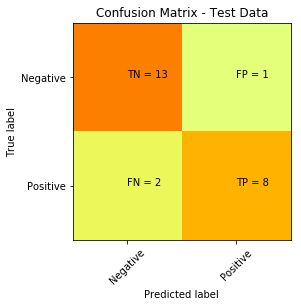

Accuracy for the model on test data:  0.875


In [262]:
optimized_accuracy_gbm_ex = plt_cm(ex_y_test, ex_optimized_gbm_y_predict)


#### Question 4

##### Append the accuracy `optimized_gbm_accuracy_ex` obtained above to the `ex_model_final_optimized` dataframe.
##### Pickle the dataframe as `ex_model_final_optimized` for later use.

In [263]:
ex_model_final_optimized = update_model_score(ex_model_final_optimized, optimized_accuracy_gbm_ex, 'optimized_accuracy_gbm')

     metrics  values                                 model
0   accuracy  0.8333                                 knn_5
1   accuracy  0.9359                      knn_GridSearchCV
2   accuracy  0.9583                                knn_27
3   accuracy  1.0000                              logistic
4   accuracy  1.0000                  logistic_withdummies
5   accuracy  1.0000                        logistic_tuned
6   accuracy  0.9167                    tree_simple_subset
7   accuracy  0.9583               full_tree_simple_subset
8   accuracy  0.9583            full_tree_optimized_subset
9   accuracy  0.8750                         random forest
10  accuracy  0.8750                      gradient_booster
11  accuracy  0.8750  optimized_accuracy_forest_cv_shuffle
12  accuracy  0.8750          optimized_accuracy_forest_cv
13  accuracy  0.8750                optimized_accuracy_gbm
14  accuracy  0.8750                optimized_accuracy_gbm


In [264]:

pickle.dump(ex_model_final_optimized, open("ex_model_final_optimized.sav", "wb" ))

